In [131]:
!pip install nltk

In [132]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

## 1. Data Loading

In [133]:
df=pd.read_csv("SMSSpamCollection.txt", header=None, sep="\t", names=["labels", "msg"])

In [134]:
df.head()

,labels,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [135]:
df["labels"]=df["labels"].map({"ham":0, "spam": 1})

In [136]:
df.head()

,labels,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 2. Txt Preprocessing

In [137]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bisakhpatra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [138]:
ps=PorterStemmer()
stop_words=set(stopwords.words('english'))

In [139]:
def clean_txt(txt):
    txt=txt.lower()
    txt=re.sub(r'[^a-zA-Z0-9]', " ", txt)
    words=txt.split()
    words=[ps.stem(w) for w in words if w not in stop_words]
    return " ".join(words)

In [140]:
df["clean_msg"]=df["msg"].apply(clean_txt)

In [141]:
df.head()

,labels,msg,clean_msg
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


## 3. Train Test Split

In [142]:
X=df["clean_msg"]
y=df["labels"]

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. BOW Implementation

In [144]:
bow=CountVectorizer(max_features=2500)

In [145]:
X_train_bow=bow.fit_transform(X_train)
X_test_bow=bow.transform(X_test)

### 4.1 Naive bayes model (BOW)

In [146]:
nb_bow=MultinomialNB()
nb_bow.fit(X_train_bow,y_train)
y_pred_nb_bow=nb_bow.predict(X_test_bow)
y_pred_nb_bow

array([0, 0, 0, ..., 0, 0, 0])

In [147]:

print("\n=== Naive Bayes (Bag of Words) ===")
print(classification_report(y_test, y_pred_nb_bow))


=== Naive Bayes (Bag of Words) ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.95      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115



### 4.2 Logistic Regression (BOW)

In [148]:
lg_bow=LogisticRegression()
lg_bow.fit(X_train_bow,y_train)
y_pred_lg_bow=lg_bow.predict(X_test_bow)
y_pred_lg_bow

array([0, 0, 0, ..., 0, 0, 0])

In [149]:

print("\n=== Logistic Regression (Bag of Words) ===")
print(classification_report(y_test, y_pred_lg_bow))


=== Logistic Regression (Bag of Words) ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



### 4.3 SVM (BOW)

In [150]:
svm_bow=LinearSVC()
svm_bow.fit(X_train_bow,y_train)
y_pred_svm_bow=svm_bow.predict(X_test_bow)
y_pred_svm_bow

/Users/bisakhpatra/Desktop/ML_Project_1/venv/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [151]:
print("\n=== SVM (Bag of Words) ===")
print(classification_report(y_test, y_pred_svm_bow))


=== SVM (Bag of Words) ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



## 5. TF-IDF Vectorizer

In [152]:
tf_idf=TfidfVectorizer(max_features=2500)
X_train_tf_idf=tf_idf.fit_transform(X_train)
X_test_tf_idf=tf_idf.transform(X_test)

### 5.1 Naive Bayes(TF-IDF)

In [153]:
nb_tf_idf = MultinomialNB()
nb_tf_idf.fit(X_train_tf_idf, y_train)
y_pred_nb_tf_idf = nb_tf_idf.predict(X_test_tf_idf)
y_pred_nb_tf_idf

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
print("\n=== Naive Bayes (TF-IDF) ===")
print(classification_report(y_test, y_pred_nb_tf_idf))


=== Naive Bayes (TF-IDF) ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### 5.2 Logistic regression (TF-IDF)

In [155]:
lg_tf_idf = LogisticRegression(max_iter=1500)
lg_tf_idf.fit(X_train_tf_idf, y_train)
y_pred_lg_tf_idf = lg_tf_idf.predict(X_test_tf_idf)
y_pred_lg_tf_idf

array([0, 0, 0, ..., 0, 0, 0])

In [156]:
print("\n=== Logistic Regression (TF-IDF) ===")
print(classification_report(y_test, y_pred_lg_tf_idf))


=== Logistic Regression (TF-IDF) ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### 5.3 SVM (TF-IDF)

In [157]:
svm_tf_idf = LinearSVC()
svm_tf_idf.fit(X_train_tf_idf, y_train)
y_pred_svm_tf_idf = svm_tf_idf.predict(X_test_tf_idf)
y_pred_svm_tf_idf

/Users/bisakhpatra/Desktop/ML_Project_1/venv/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [158]:
print("\n=== SVM (TF-IDF) ===")
print(classification_report(y_test, y_pred_svm_tf_idf))


=== SVM (TF-IDF) ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [159]:
result=[]

def add_result(model_name, y_true, y_pred):
    result.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
    })

In [162]:
add_result("NB (BoW)", y_test, y_pred_nb_bow)
add_result("LogReg (BoW)", y_test, y_pred_lg_bow)
add_result("SVM (BoW)", y_test, y_pred_svm_bow)

In [164]:
add_result("NB (TF-IDF)", y_test, y_pred_nb_tf_idf)
add_result("LogReg (TF-IDF)", y_test, y_pred_lg_tf_idf)
add_result("SVM (TF-IDF)", y_test, y_pred_svm_tf_idf)

In [169]:
result_df=pd.DataFrame(result)

In [170]:
result_df

,Model,Accuracy,Precision,Recall,F1-Score
0,NB (BoW),0.984753,0.940000,0.946309,0.943144
1,NB (BoW),0.984753,0.940000,0.946309,0.943144
2,LogReg (BoW),0.984753,0.992537,0.892617,0.939929
3,SVM (BoW),0.988341,0.992754,0.919463,0.954704
4,NB (TF-IDF),0.982063,0.984962,0.879195,0.929078
5,LogReg (TF-IDF),0.976682,1.000000,0.825503,0.904412
6,SVM (TF-IDF),0.988341,0.992754,0.919463,0.954704


In [171]:
result_df.drop(result_df.index[0], inplace=True)

In [172]:
result_df

,Model,Accuracy,Precision,Recall,F1-Score
1,NB (BoW),0.984753,0.940000,0.946309,0.943144
2,LogReg (BoW),0.984753,0.992537,0.892617,0.939929
3,SVM (BoW),0.988341,0.992754,0.919463,0.954704
4,NB (TF-IDF),0.982063,0.984962,0.879195,0.929078
5,LogReg (TF-IDF),0.976682,1.000000,0.825503,0.904412
6,SVM (TF-IDF),0.988341,0.992754,0.919463,0.954704


NameError: name 'plt' is not defined

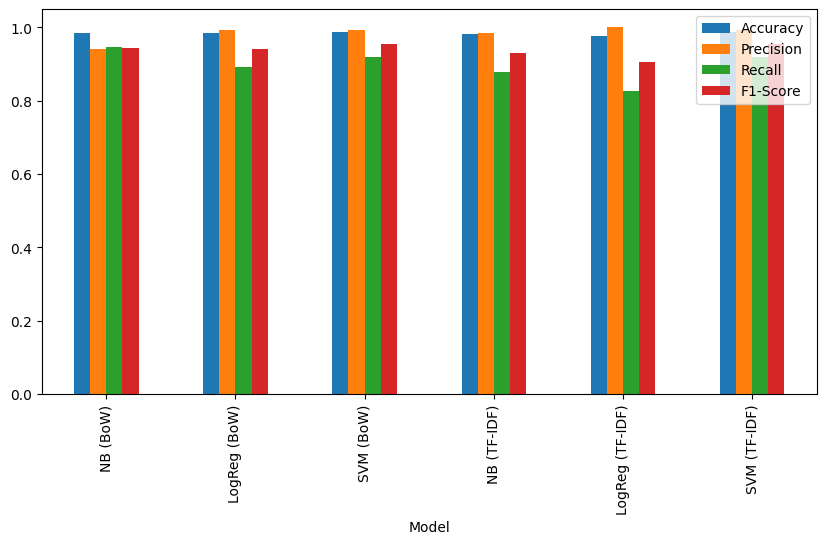

In [175]:
result_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(kind="bar", figsize=(10, 5))
plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.show()